# Loading the dataset from kaggle

In [1]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

100% 9.64G/9.66G [01:42<00:00, 50.9MB/s]
100% 9.66G/9.66G [01:42<00:00, 101MB/s] 


In [7]:
!unzip /content/diabetic-retinopathy-level-detection.zip

Archive:  /content/diabetic-retinopathy-level-detection.zip
  inflating: inception-diabetic.h5   
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfb17a7cc8d4.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfdbaef73a8b.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfed7c1172ec.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cff262ed8f4c.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cffc50047828.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d02b79fc3200.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d0926ed2c8e5.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d160ebef4117.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e39b9d6f0.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e59a2b33a.png  
  inflating: preprocessed dataset/preprocessed dataset/testing

# Importing libraries

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pickle

# Image preprocessing

In [9]:
imageSize = [224, 224]
trainPath = "/content/preprocessed dataset/preprocessed dataset/training"
testPath = "/content/preprocessed dataset/preprocessed dataset/testing"

In [10]:
training_data = keras.preprocessing.image_dataset_from_directory(
    trainPath,
    batch_size = 16,
    image_size =(224,224),
    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.01
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    testPath,
    batch_size = 16,
    image_size =(224,224),
    shuffle = True,
    seed =123,
    validation_split =0.99,
    subset ='validation')

Found 3662 files belonging to 5 classes.
Using 3626 files for training.
Found 734 files belonging to 5 classes.
Using 726 files for validation.


# Resnet50 model

In [11]:
resnet_model = Sequential()
pretrained_model= keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(5, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [12]:
resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.00009), metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  training_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
227/227 [==============================] - 305s 1s/step - loss: 0.8743 - accuracy: 0.6906 - val_loss: 0.7144 - val_accuracy: 0.7328
Epoch 2/10
227/227 [==============================] - 319s 1s/step - loss: 0.7377 - accuracy: 0.7242 - val_loss: 0.6819 - val_accuracy: 0.7576
Epoch 3/10
227/227 [==============================] - 319s 1s/step - loss: 0.6597 - accuracy: 0.7659 - val_loss: 0.6276 - val_accuracy: 0.7645
Epoch 5/10
227/227 [==============================] - 288s 1s/step - loss: 0.6414 - accuracy: 0.7642 - val_loss: 0.6139 - val_accuracy: 0.7713
Epoch 6/10
227/227 [==============================] - 285s 1s/step - loss: 0.6272 - accuracy: 0.7703 - val_loss: 0.6125 - val_accuracy: 0.7727
Epoch 7/10
227/227 [==============================] - 284s 1s/step - loss: 0.6173 - accuracy: 0.7694 - val_loss: 0.5898 - val_accuracy: 0.7700
Epoch 8/10
227/227 [==============================] - 288s 1s/step - loss: 0.5909 - accuracy: 0.7796 - val_loss: 0.6189 - val_accuracy: 0.7865

# Saving the model

In [ ]:
resnet_model.save('inception-diabetic.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the model for testing the model

In [13]:
model = load_model('inception-diabetic.h5')

# Loading a image from class 0



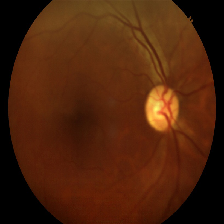

In [30]:
i = image.load_img('/content/preprocessed dataset/preprocessed dataset/testing/0/d160ebef4117.png', target_size=(224,224))
i

In [31]:
img_array = image.img_to_array(i)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = [
                "No apparent Diabetic retinopathy",
                "Mild nonproliferative Diabetic retinopathy (Mild NPDR)",
                "Moderate nonproliferative Diabetic retinopathy (Moderate NPDR)",
                "Severe nonproliferative Diabetic retinopathy (Severe NPDR)",
                "Proliferative Diabetic retinopathy (PDR)",
            ]
predicted_label = class_labels[predicted_class]
print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 27ms/step
Predicted class: No apparent Diabetic retinopathy


# Loading a image from class 1

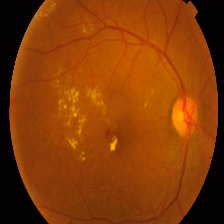

In [32]:
i = image.load_img('/content/preprocessed dataset/preprocessed dataset/testing/1/d4f32b9c07df.png', target_size=(224,224))
i

In [33]:
img_array = image.img_to_array(i)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = [
                "No apparent Diabetic retinopathy",
                "Mild nonproliferative Diabetic retinopathy (Mild NPDR)",
                "Moderate nonproliferative Diabetic retinopathy (Moderate NPDR)",
                "Severe nonproliferative Diabetic retinopathy (Severe NPDR)",
                "Proliferative Diabetic retinopathy (PDR)",
            ]
predicted_label = class_labels[predicted_class]
print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 27ms/step
Predicted class: Moderate nonproliferative Diabetic retinopathy (Moderate NPDR)


# Loading a image from class 2

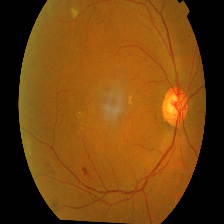

In [34]:
i = image.load_img('/content/preprocessed dataset/preprocessed dataset/testing/2/cac40227d3b2.png', target_size=(224,224))
i

In [35]:
img_array = image.img_to_array(i)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = [
                "No apparent Diabetic retinopathy",
                "Mild nonproliferative Diabetic retinopathy (Mild NPDR)",
                "Moderate nonproliferative Diabetic retinopathy (Moderate NPDR)",
                "Severe nonproliferative Diabetic retinopathy (Severe NPDR)",
                "Proliferative Diabetic retinopathy (PDR)",
            ]
predicted_label = class_labels[predicted_class]
print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 27ms/step
Predicted class: Moderate nonproliferative Diabetic retinopathy (Moderate NPDR)


# Loading a image from class 3

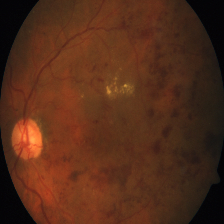

In [36]:
i = image.load_img('/content/preprocessed dataset/preprocessed dataset/testing/3/c31651ea04c6.png', target_size=(224,224))
i

In [37]:
img_array = image.img_to_array(i)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = [
                "No apparent Diabetic retinopathy",
                "Mild nonproliferative Diabetic retinopathy (Mild NPDR)",
                "Moderate nonproliferative Diabetic retinopathy (Moderate NPDR)",
                "Severe nonproliferative Diabetic retinopathy (Severe NPDR)",
                "Proliferative Diabetic retinopathy (PDR)",
            ]
predicted_label = class_labels[predicted_class]
print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 43ms/step
Predicted class: Severe nonproliferative Diabetic retinopathy (Severe NPDR)


# Loading a image from class 4

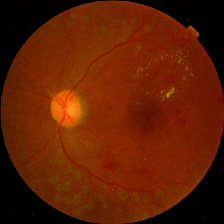

In [40]:
i = image.load_img('/content/preprocessed dataset/preprocessed dataset/testing/4/d85ea1220a03.png', target_size=(224,224))
i

In [41]:
img_array = image.img_to_array(i)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = [
                "No apparent Diabetic retinopathy",
                "Mild nonproliferative Diabetic retinopathy (Mild NPDR)",
                "Moderate nonproliferative Diabetic retinopathy (Moderate NPDR)",
                "Severe nonproliferative Diabetic retinopathy (Severe NPDR)",
                "Proliferative Diabetic retinopathy (PDR)",
            ]
predicted_label = class_labels[predicted_class]
print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 27ms/step
Predicted class: Proliferative Diabetic retinopathy (PDR)


# Model summary

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0